In [1]:
import dstpy
import matplotlib.pyplot as plt
import numpy as np
import struct
from b39dst import *
%matplotlib inline

Welcome to JupyROOT 6.30/06


In [5]:
amps = ['10','20','30','40']
files = [f"{amp}ma/nf{amp}mapoint5us.mdtax4.fraw1.dst.gz" for amp in amps]
# dstpy.addFile(f"{amp}ma/nf{amp}mapoint5us.mdtax4.fraw1.dst.gz")

In [3]:
npe_list = [read_dst_file_fraw1(file) for file in files];

10ma/nf10mapoint5us.mdtax4.fraw1.dst.gz added to the DST chain
Event 0 (5 banks): fraw1,ftrg1,fpho1,fscn1,tlweat
Event 1 (5 banks): fraw1,ftrg1,fpho1,fscn1,tlweat
Event 2 (5 banks): fraw1,ftrg1,fpho1,fscn1,tlweat
Event 3 (5 banks): fraw1,ftrg1,fpho1,fscn1,tlweat
Event 4 (5 banks): fraw1,ftrg1,fpho1,fscn1,tlweat
Event 5 (5 banks): fraw1,ftrg1,fpho1,fscn1,tlweat
Event 6 (5 banks): fraw1,ftrg1,fpho1,fscn1,tlweat
Event 7 (5 banks): fraw1,ftrg1,fpho1,fscn1,tlweat
Event 8 (5 banks): fraw1,ftrg1,fpho1,fscn1,tlweat
Event 9 (5 banks): fraw1,ftrg1,fpho1,fscn1,tlweat
Event 10 (5 banks): fraw1,ftrg1,fpho1,fscn1,tlweat
Event 11 (5 banks): fraw1,ftrg1,fpho1,fscn1,tlweat
Event 12 (5 banks): fraw1,ftrg1,fpho1,fscn1,tlweat
Event 13 (5 banks): fraw1,ftrg1,fpho1,fscn1,tlweat
Event 14 (5 banks): fraw1,ftrg1,fpho1,fscn1,tlweat
Event 15 (5 banks): fraw1,ftrg1,fpho1,fscn1,tlweat
Event 16 (5 banks): fraw1,ftrg1,fpho1,fscn1,tlweat
Event 17 (5 banks): fraw1,ftrg1,fpho1,fscn1,tlweat
Event 18 (5 banks): fraw1,ftr

 $$$ dst_get_block_ : End of input file reached
 $$$ dst_get_block_ : End of input file reached
 $$$ dst_get_block_ : End of input file reached
 $$$ dst_get_block_ : End of input file reached
 $$$ dst_get_block_ : End of input file reached
 $$$ dst_get_block_ : End of input file reached
 $$$ dst_get_block_ : End of input file reached
 $$$ dst_get_block_ : End of input file reached


In [1]:
tube_area = .001197
dist = 1.237
tube_omega = tube_area/dist**2
qe = .27

In [6]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
colors = plt.cm.rainbow(np.array([10,20,30,40])/40)
for i,(amp, npe_array) in enumerate(zip(amps,npe_list)):
    photons = npe_array / qe
    photons_per_omega_per_ns = photons / tube_omega / 100.
    meanwfs = photons_per_omega_per_ns.mean(axis=0)
    print(meanwfs.mean(axis=0).max())
    plt.plot(meanwfs.mean(axis=0), color=colors[i])
    # for j in range(meanwfs.shape[0]):
    #     plt.plot(meanwfs[j], color=colors[i])

NameError: name 'npe_list' is not defined

<Figure size 640x480 with 0 Axes>

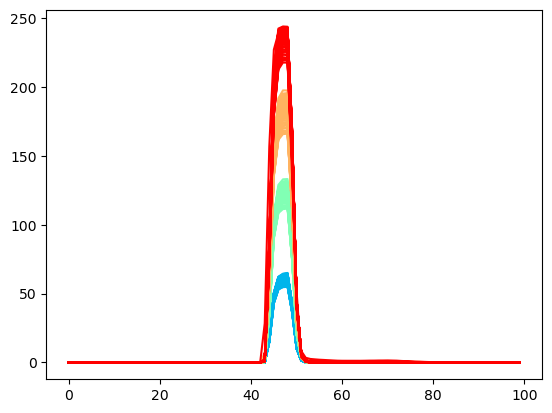

In [6]:
plt.figure()
for i,(amp, npe_array) in enumerate(zip(amps,npe_list)):
    mean_npe = npe_array.mean(axis=0)
    for j in range(meanwfs.shape[0]):
        plt.plot(mean_npe[j], color=colors[i])

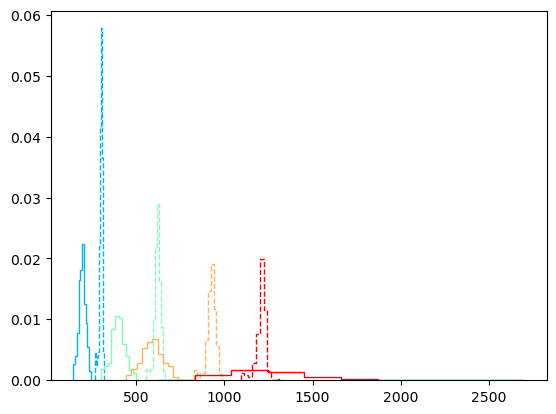

In [7]:
plt.figure()
for i,npe_array in enumerate(npe_list):
    pas = (npe_array[:,:,:53]).sum(axis=2)

    npe_estimate = pas.mean(axis=0)**2/np.var(pas,axis=0)

    plt.hist(npe_estimate,density=True, histtype='step',color=colors[i])
    plt.hist(pas.mean(axis=0),density=True, histtype='step',color=colors[i],linestyle='dashed')

In [8]:
pas.mean(axis=0).shape

(256,)

In [10]:
np.savez('b39data.npz',**{amp:npe_array for amp, npe_array in zip(amps,npe_list)})

In [11]:
data = np.load('b39data.npz')